subwayTime.csv 파일을 가지고 다양한 데이터 분석을 해봅시다.

In [ ]:
import csv
file = open('subwayTime.csv','r',encoding='utf-8')
data = csv.reader(file)

for row in data :
    print(row)

file.close()

헤더 건너뛰기, 데이터를  int 타입으로 변환

In [ ]:
import csv
file = open('subwayTime.csv','r',encoding='utf-8')
data = csv.reader(file)
next(data) # 헤더 건너뛰기
next(data)

for row in data :
    row[4:] = map(int, row[4:]) # int로 변환 4번째 컬럼부터 마지막 컬럼까지 int 로 변환하는것을 
    #변환하는 것을 mapping (반복문 처리를 하지 않아도 내부에서 반복해줌 (맵함수))
    print(row)

file.close()

문제) 출근시간에 (06~11시)대에 가장 많이 타고 내리는 역?


In [10]:
import csv
file = open('subwayTime.csv','r',encoding='utf-8')
data = csv.reader(file)
next(data) # 헤더 건너뛰기
next(data)

maxCount = -999
maxStation = ''

for row in data :
    row[4:] = map(int, row[4:]) # int로 변환 4번째 컬럼부터 마지막 컬럼까지 int 로 변환하는것을 
    #변환하는 것을 mapping (반복문 처리를 하지 않아도 내부에서 반복해줌 (맵함수))
    sumCount  = sum(row[8:18])
    if sumCount > maxCount :
        maxCount = sumCount
        maxStation = row[3] + "_" + row[1]

print(maxCount, maxStation)


file.close()

1341427 강남_2호선


문제) 밤 11시~ 1시 시간대 가장 많이 타는 역

In [26]:
import csv
file = open('subwayTime.csv','r',encoding='utf-8')
data = csv.reader(file)
next(data) # 헤더 건너뛰기
next(data)

maxCount = -999
maxStation = ''

for row in data :
    row[4:] = map(int, row[4:]) # int로 변환 4번째 컬럼부터 마지막 컬럼까지 int 로 변환하는것을 
    #변환하는 것을 mapping (반복문 처리를 하지 않아도 내부에서 반복해줌 (맵함수))
    sumCount  = sum(row[42:46:2])
    #sumCount  = sum(row[42::46])
    #sumCount  = row[42]+row[44]+row[46]
    if sumCount > maxCount :
        maxCount = sumCount
        maxStation = row[3] + "_" + row[1]

print(maxCount, maxStation)


file.close()

111930 홍대입구_2호선


문제) 시간대별 사람들이 가장 많이, 타고 내리는 역
시간대별 가장 많이 타고 내리는 인원 차트로 나타내보자.

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
[12540, 40993, 73289, 196109, 282930, 168856, 92097, 89361, 99800, 110696, 122842, 147503, 179006, 277252, 351537, 227563, 181553, 208778, 197719, 98639, 13789, 19, 2, 1]


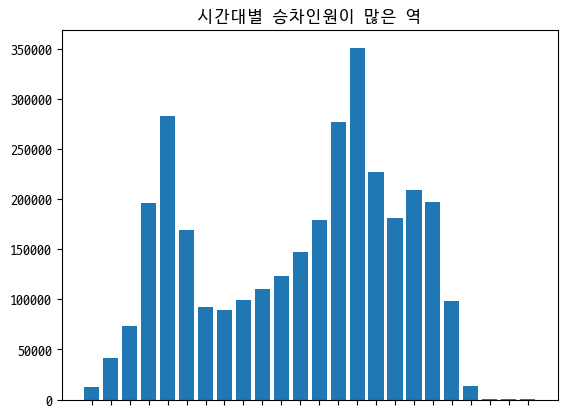

In [60]:
import csv
import matplotlib.pyplot as plt


file = open('subwayTime.csv','r',encoding='utf-8')
data = csv.reader(file)
next(data) # 헤더 건너뛰기
next(data)


maxInCount = [0] * 24
maxStation = [''] * 24

for row in data :
    row[4:] = map(int, row[4:]) # int로 변환 4번째 컬럼부터 마지막 컬럼까지 int 로 변환하는것을 
    #변환하는 것을 mapping (반복문 처리를 하지 않아도 내부에서 반복해줌 (맵함수))
    for i in range(24) :
        sumCount = row[i * 2 + 4 ] #+ row[(i * 2 + 4)+ 1]
        if sumCount > maxCount[i] :
            maxCount[i] = sumCount
            maxStation[i] = row[3] + '(' + str(i + 4) + ')'
print(maxStation)
print(maxCount)

plt.title('시간대별 승차인원이 많은 역')
plt.rc('font', family='D2Coding')
plt.bar(range(24), maxCount)
plt.xticks(range(24), maxStation, rotation=90)
plt.show()


file.close()

['영등포(4)', '강남(5)', '강남(6)', '역삼(7)', '가산디지털단지(8)', '강남(9)', '강남(10)', '홍대입구(11)', '홍대입구(12)', '홍대입구(13)', '홍대입구(14)', '홍대입구(15)', '홍대입구(16)', '홍대입구(17)', '잠실(송파구청)(18)', '신림(19)', '신림(20)', '신림(21)', '신림(22)', '신림(23)', '신림(24)', '서울대입구(관악구청)(25)', '수유(강북구청)(26)', '관악(27)']
[127, 11875, 63922, 180733, 425384, 352090, 167170, 142452, 166589, 180962, 171575, 170993, 178210, 204797, 260314, 193771, 123525, 121581, 111850, 69596, 22900, 3736, 2, 1]


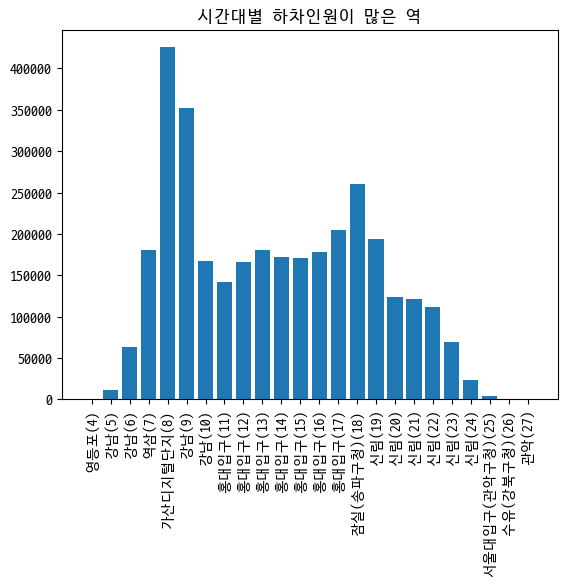

In [63]:
import csv
import matplotlib.pyplot as plt
file = open('subwayTime.csv', 'r', encoding='utf-8')
data = csv.reader(file)
next(data)  # 헤더 건너뛰기
next(data)
maxOutCount = [0] * 24
maxOUtStation = [''] * 24 
for row in data :
    row[4:] = map(int, row[4:])  # 4번째 컬럼부터 마지막 컬럼 까지 int로 변환하는것을 mapping (반복문 처리를 하지 않아도 내부에서 반복해줌)
    for i in range(24) :
        sumOutCount = row[i * 2 + 5] 
        
        
        if sumOutCount > maxOutCount[i] :
            maxOutCount[i] = sumOutCount
            maxOUtStation[i] = row[3] + '(' + str(i + 4) + ')'
        
        
print(maxOUtStation)
print(maxOutCount)


plt.rc('font', family='D2Coding')  # 한글폰트 설정
plt.title('시간대별 하차인원이 많은 역')
plt.bar(range(24), maxOutCount)
plt.xticks(range(24), maxOUtStation, rotation=90)
plt.show()
file.close()

문제) 지하철 시간대별 승하차 인원 추이를 나타내는 그래프를 그리세요

시간대별 승차 인원 파란색으로
시간대별 하차 인원 빨간색으로...
꺽은석 그래프로 나타내세요

[164170, 3431125, 7254978, 17538316, 19462874, 11936395, 9063778, 9117259, 9924404, 10044848, 10036494, 11390232, 13516453, 18450187, 22273755, 11506315, 9337781, 8542263, 6656011, 2741723, 385874, 244, 5, 2]
[2440, 878647, 4724367, 11030526, 23661763, 15175107, 9718018, 9111947, 9605352, 10195848, 9760877, 10471021, 11976883, 15418663, 21668157, 15956106, 9740943, 8646207, 7809284, 4744709, 1465415, 42402, 10, 2]


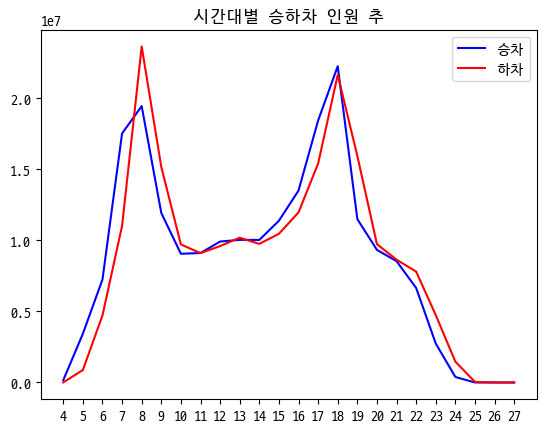

In [81]:
import csv
import matplotlib.pyplot as plt


file = open('subwayTime.csv','r',encoding='utf-8')
data = csv.reader(file)
next(data) # 헤더 건너뛰기
next(data)


s_in = [0] * 24
s_out = [0] * 24


for row in data :
    row[4:] = map(int, row[4:])
    for i in range(24) :
        s_in[i] += row[i * 2 + 4 ]
        s_out[i] += row[i * 2 + 5]




print(maxInCount)
print(maxOutCount)

plt.title('시간대별 승하차 인원 추')
plt.rc('font', family='D2Coding')
plt.plot(s_in, label='승차', color='blue')
plt.plot(s_out, label='하차', color='red')
plt.xticks(range(24), range(4,28))

plt.legend()
plt.show()


file.close()